In [2]:
# Import principales para nuestro proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays

In [4]:
# Cargar los datos de competencia y ventas
competencia_df = pd.read_csv('../data/raw/entrenamiento/competencia.csv')
ventas_df = pd.read_csv('../data/raw/entrenamiento/ventas.csv')

# Mostrar las primeras filas de los dataframes
print('Competencia:')
display(competencia_df.head(3))
print('Ventas:')
display(ventas_df.head(3))

Competencia:


,fecha,producto_id,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,82.96,111.88,97.43
1,2021-10-25,PROD_002,112.56,108.61,115.58
2,2021-10-25,PROD_003,79.79,78.44,80.11


Ventas:


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86


In [8]:
# Informe de calidad de datos para ventas_df
print('--- INFORME DE CALIDAD DE DATOS: ventas_df ---')
print('\nTipos de datos:')
print(ventas_df.dtypes)

print('\nValores nulos por columna:')
print(ventas_df.isnull().sum())

print('\nCantidad de filas duplicadas:')
print(ventas_df.duplicated().sum())

print('\nEstadísticas descriptivas (numéricas):')
print(ventas_df.describe())

print('\nEstadísticas descriptivas (categóricas):')
print(ventas_df.describe(include=['object', 'category']))

print('\nResumen de filas únicas por columna:')
print(ventas_df.nunique())

print('\n--- FIN DEL INFORME DE CALIDAD DE DATOS ---')

--- INFORME DE CALIDAD DE DATOS: ventas_df ---

Tipos de datos:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object

Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

Cantidad de filas duplicadas:
0

Estadísticas descriptivas (numéricas):
       precio_base  unidades_vendidas  precio_venta      ingresos
count  3552.000000         3552.00000   3552.000000   3552.000000
mean    123.125000            4.87866    121.816546    605.972323
std     165.576753            6.31102    164.017963   1079.071192
min      20.000000      

In [5]:
# Informe de calidad de datos para competencia_df
print('--- INFORME DE CALIDAD DE DATOS: competencia_df ---')
print('\nTipos de datos:')
print(competencia_df.dtypes)

print('\nValores nulos por columna:')
print(competencia_df.isnull().sum())

print('\nCantidad de filas duplicadas:')
print(competencia_df.duplicated().sum())

print('\nEstadísticas descriptivas (numéricas):')
print(competencia_df.describe())

print('\nEstadísticas descriptivas (categóricas):')
print(competencia_df.describe(include=['object', 'category']))

print('\nResumen de filas únicas por columna:')
print(competencia_df.nunique())

print('\n--- FIN DEL INFORME DE CALIDAD DE DATOS ---')

--- INFORME DE CALIDAD DE DATOS: competencia_df ---

Tipos de datos:
fecha            object
producto_id      object
Amazon          float64
Decathlon       float64
Deporvillage    float64
dtype: object

Valores nulos por columna:
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64

Cantidad de filas duplicadas:
0

Estadísticas descriptivas (numéricas):
            Amazon    Decathlon  Deporvillage
count  3552.000000  3552.000000   3552.000000
mean    118.623407   111.412182    118.894628
std     156.095628   148.508132    160.216448
min      16.850000    15.450000     16.770000
25%      47.117500    43.285000     47.310000
50%      73.180000    66.285000     72.700000
75%     114.342500   111.172500    114.985000
max     858.350000   867.337500    932.325000

Estadísticas descriptivas (categóricas):
             fecha producto_id
count         3552        3552
unique         148          24
top     2021-10-25    PROD_001
freq         

In [6]:
# Convertir la columna fecha a datetime en ambos dataframes
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

In [7]:
# Validar el tipo de dato de la columna fecha en ambos dataframes
print('Tipo de dato de ventas_df["fecha"]:', ventas_df['fecha'].dtype)
print('Tipo de dato de competencia_df["fecha"]:', competencia_df['fecha'].dtype)

Tipo de dato de ventas_df["fecha"]: datetime64[ns]
Tipo de dato de competencia_df["fecha"]: datetime64[ns]


In [8]:
print("VENTAS INFO")
ventas_df.info()
print("COMPETENCIA INFO")
competencia_df.info()


VENTAS INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB
COMPETENCIA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   C

In [9]:
# Integrar ventas_df y competencia_df usando fecha y producto_id como claves
integrado_df = pd.merge(ventas_df, competencia_df, on=['fecha', 'producto_id'], how='inner')
print('Shape del dataframe integrado:', integrado_df.shape)
display(integrado_df.head())

Shape del dataframe integrado: (3552, 13)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


🤖 # Análisis exploratorio completo de `integrado_df`

A continuación se presentan diferentes análisis y visualizaciones para entender mejor el comportamiento de las ventas y la competencia.

In [10]:
# Análisis general de integrado_df
print('--- INFORME DE CALIDAD DE DATOS: integrado_df ---')
print('\nTipos de datos:')
print(integrado_df.dtypes)
print('\nValores nulos por columna:')
print(integrado_df.isnull().sum())
print('\nCantidad de filas duplicadas:')
print(integrado_df.duplicated().sum())
print('\nEstadísticas descriptivas (numéricas):')
print(integrado_df.describe())
print('\nEstadísticas descriptivas (categóricas):')
print(integrado_df.describe(include=['object', 'category']))
print('\nResumen de filas únicas por columna:')
print(integrado_df.nunique())
print('\n--- FIN DEL INFORME DE CALIDAD DE DATOS ---')

--- INFORME DE CALIDAD DE DATOS: integrado_df ---

Tipos de datos:
fecha                datetime64[ns]
producto_id                  object
nombre                       object
categoria                    object
subcategoria                 object
precio_base                   int64
es_estrella                    bool
unidades_vendidas             int64
precio_venta                float64
ingresos                    float64
Amazon                      float64
Decathlon                   float64
Deporvillage                float64
dtype: object

Valores nulos por columna:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
Amazon               0
Decathlon            0
Deporvillage         0
dtype: int64

Cantidad de filas duplicadas:
0

Estadísticas descriptivas (numéricas):
                               fecha  

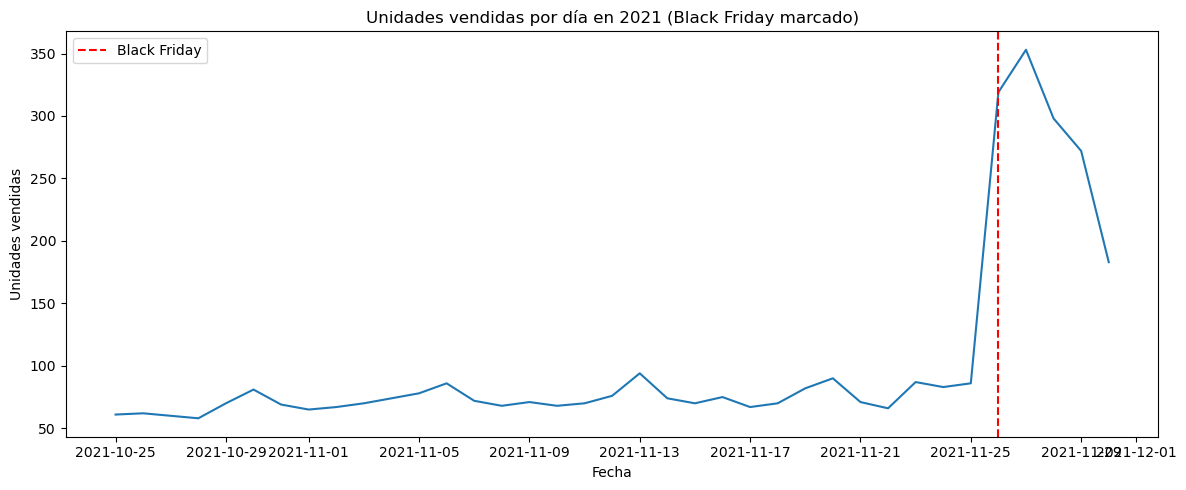

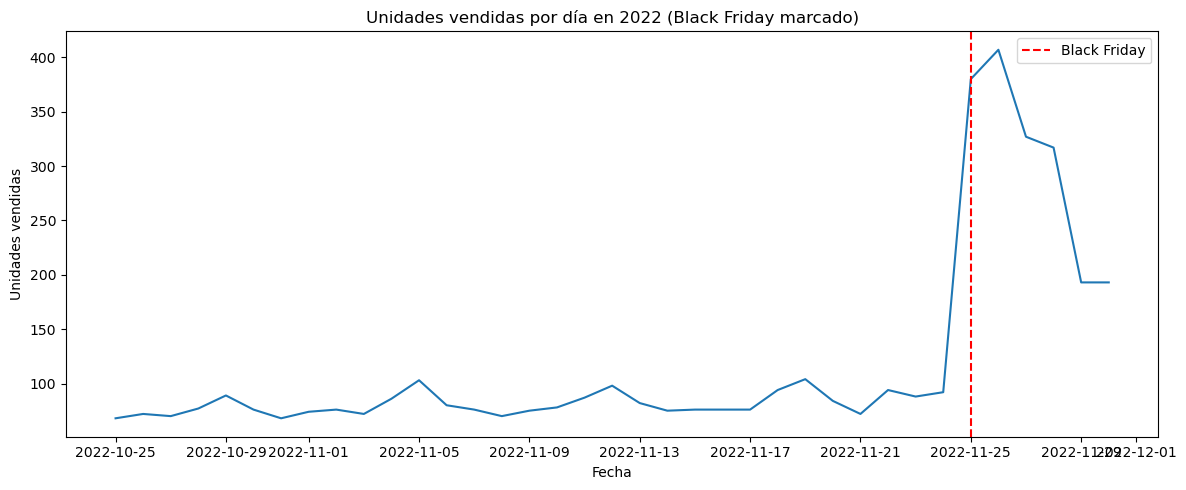

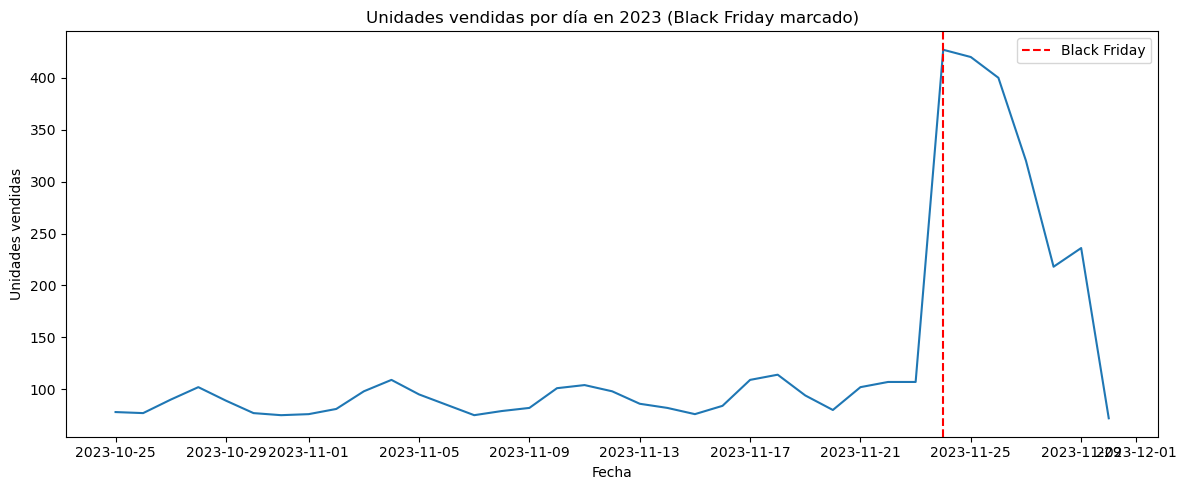

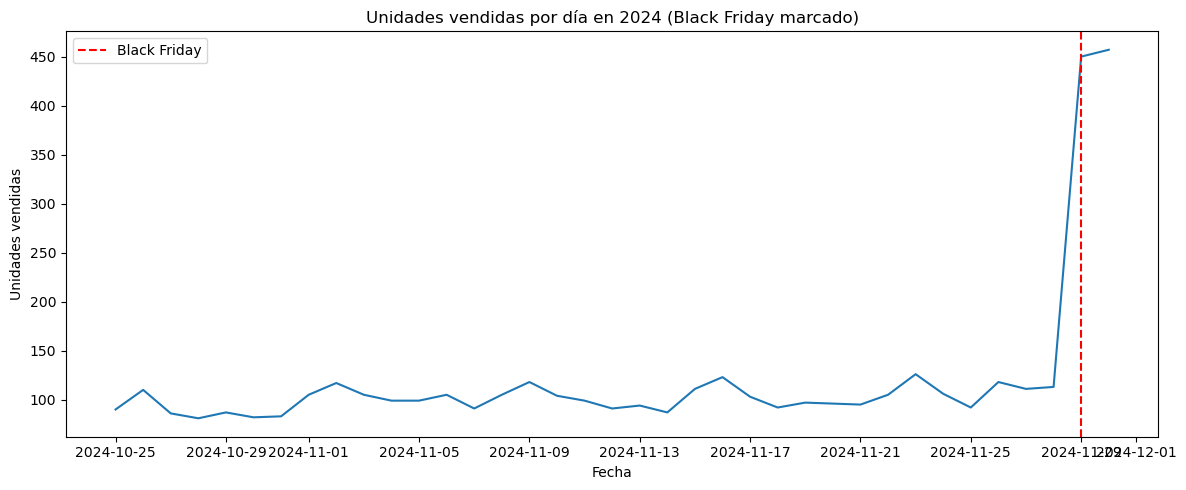

In [11]:
# Gráfico de líneas temporales por año de unidades vendidas y marcando Black Fridays
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

years = integrado_df['fecha'].dt.year.unique()
blackfridays = []
for year in years:
    # Black Friday: último viernes de noviembre
    nov = integrado_df[(integrado_df['fecha'].dt.year == year) & (integrado_df['fecha'].dt.month == 11)]
    fridays = nov[nov['fecha'].dt.weekday == 4]
    if len(fridays) > 0:
        bf_date = fridays.iloc[-1]['fecha']
        blackfridays.append(bf_date)
    else:
        blackfridays.append(None)
for i, year in enumerate(years):
    plt.figure(figsize=(12,5))
    df_year = integrado_df[integrado_df['fecha'].dt.year == year]
    df_group = df_year.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    sns.lineplot(data=df_group, x='fecha', y='unidades_vendidas')
    if blackfridays[i] is not None:
        plt.axvline(blackfridays[i], color='red', linestyle='--', label='Black Friday')
        plt.legend()
    plt.title(f'Unidades vendidas por día en {year} (Black Friday marcado)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.tight_layout()
    plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21788\2617736508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dia, x='dia_semana', y='unidades_vendidas', palette='viridis')


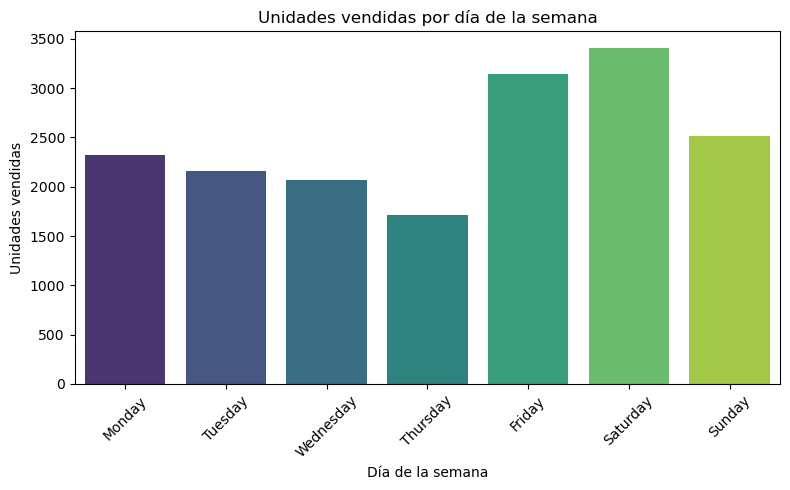

In [12]:
# Gráfico de suma de unidades vendidas por día de la semana
integrado_df['dia_semana'] = integrado_df['fecha'].dt.day_name()
df_dia = integrado_df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=df_dia, x='dia_semana', y='unidades_vendidas', palette='viridis')
plt.title('Unidades vendidas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21788\2696428951.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_cat, x='categoria', y='unidades_vendidas', palette=rojos)


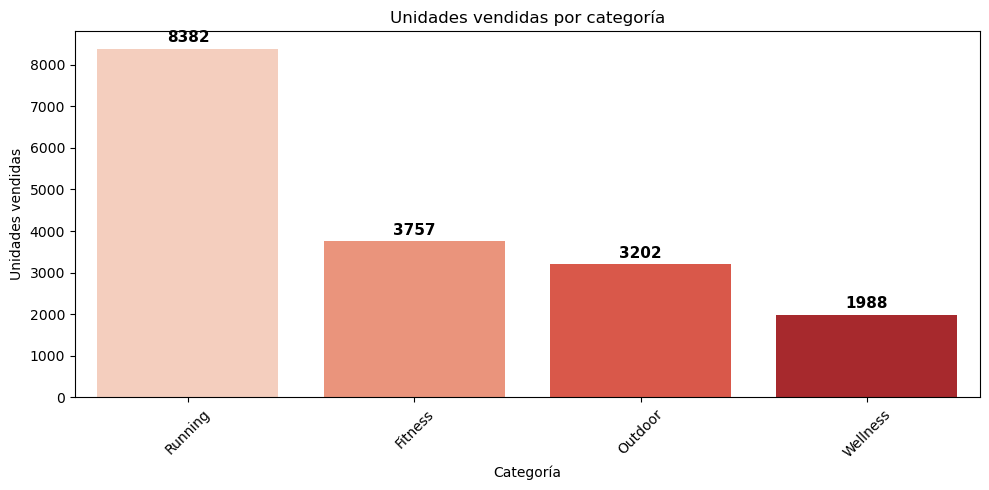

In [13]:
# Gráfico de suma de unidades vendidas por categoría con barras en tonos rojos y etiquetas
df_cat = ventas_df.groupby('categoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))

# Generar una paleta de rojos con seaborn
rojos = sns.color_palette("Reds", n_colors=len(df_cat))

bars = sns.barplot(data=df_cat, x='categoria', y='unidades_vendidas', palette=rojos)

# Añadir etiquetas de unidades vendidas en cada barra
for i, row in df_cat.iterrows():
    plt.text(i, row['unidades_vendidas'] + max(df_cat['unidades_vendidas'])*0.01, 
             str(row['unidades_vendidas']), 
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Unidades vendidas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21788\714592936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_subcat, x='subcategoria', y='unidades_vendidas', palette='rocket')


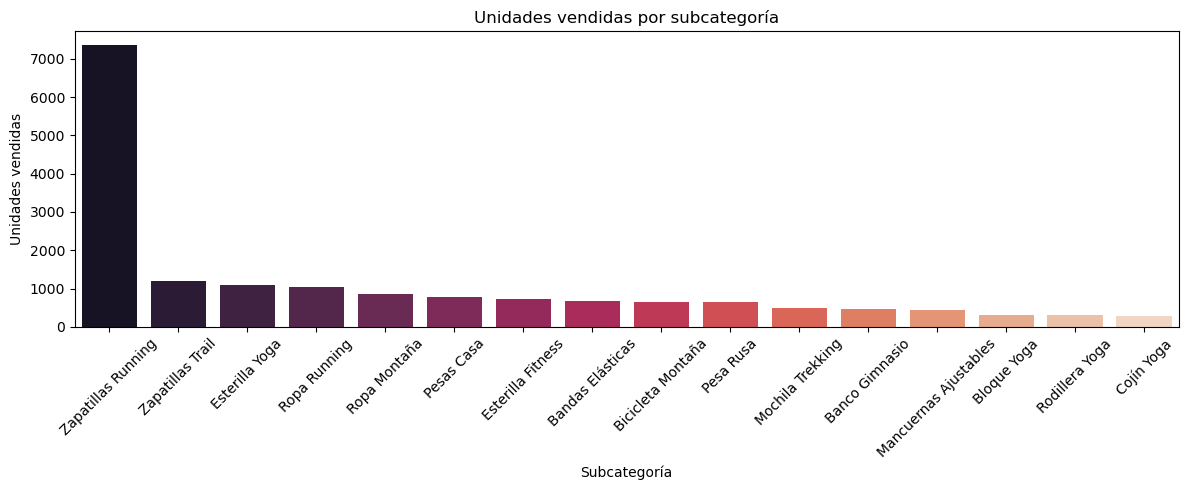

In [14]:
                    # Gráfico de suma de unidades vendidas por subcategoría
df_subcat = integrado_df.groupby('subcategoria')['unidades_vendidas'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=df_subcat, x='subcategoria', y='unidades_vendidas', palette='rocket')
plt.title('Unidades vendidas por subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21788\2884917946.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='nombre', y='unidades_vendidas', palette='crest')


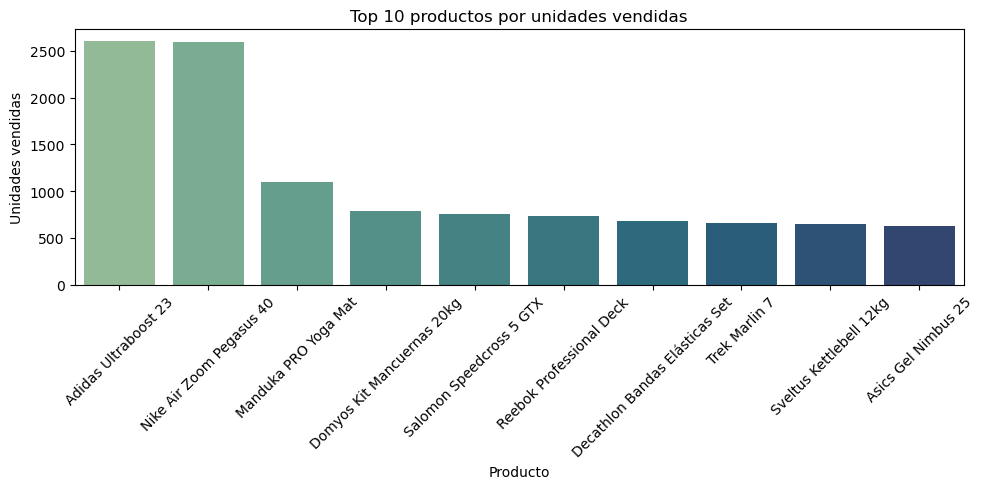

In [15]:
        # Gráfico de los top productos por unidades vendidas
top_n = 10
df_top = integrado_df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(top_n).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=df_top, x='nombre', y='unidades_vendidas', palette='crest')
plt.title(f'Top {top_n} productos por unidades vendidas')
plt.xlabel('Producto')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

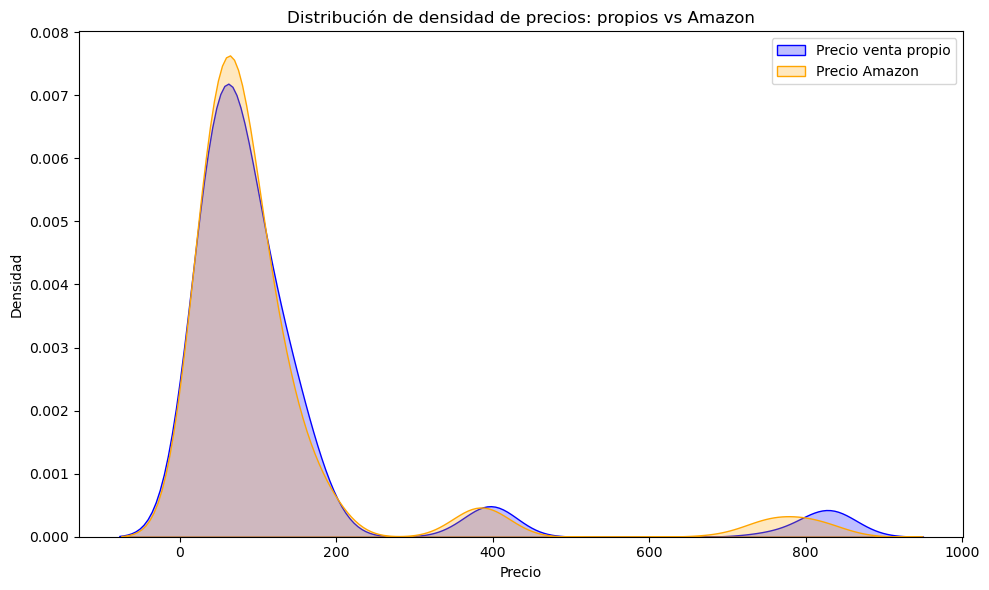

In [16]:
# Análisis de densidad de distribución de precios propios vs precios Amazon
plt.figure(figsize=(10,6))
sns.kdeplot(integrado_df['precio_venta'], label='Precio venta propio', fill=True, color='blue')
sns.kdeplot(integrado_df['Amazon'], label='Precio Amazon', fill=True, color='orange')
plt.title('Distribución de densidad de precios: propios vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Creación de variables temporales y de calendario usando holidays para Perú
import holidays
peru_holidays = holidays.country_holidays('PE')

# Variables de fecha básicas
integrado_df['anio'] = integrado_df['fecha'].dt.year
integrado_df['mes'] = integrado_df['fecha'].dt.month
integrado_df['dia_mes'] = integrado_df['fecha'].dt.day
integrado_df['dia_semana'] = integrado_df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
integrado_df['nombre_dia'] = integrado_df['fecha'].dt.day_name()

# Es fin de semana
integrado_df['es_fin_semana'] = integrado_df['dia_semana'].isin([5,6])

# Es festivo en Perú
integrado_df['es_festivo'] = integrado_df['fecha'].isin(peru_holidays)

# Es Black Friday (último viernes de noviembre)
def es_black_friday(fecha):
    if fecha.month == 11 and fecha.weekday() == 4:
        # Último viernes de noviembre
        last_friday = max([d for d in pd.date_range(start=fecha.replace(day=1), end=fecha.replace(day=30)) if d.weekday() == 4])
        return fecha == last_friday
    return False
integrado_df['es_black_friday'] = integrado_df['fecha'].apply(es_black_friday)

# Es Cyber Monday (primer lunes después de Black Friday)
def es_cyber_monday(fecha):
    if fecha.month == 11 or fecha.month == 12:
        # Buscar el Black Friday de ese año
        year = fecha.year
        nov = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30')
        fridays = [d for d in nov if d.weekday() == 4]
        if fridays:
            black_friday = fridays[-1]
            cyber_monday = black_friday + pd.Timedelta(days=3)
            return fecha == cyber_monday
    return False
integrado_df['es_cyber_monday'] = integrado_df['fecha'].apply(es_cyber_monday)

# Día del año
integrado_df['dia_anio'] = integrado_df['fecha'].dt.dayofyear

# Semana del año
integrado_df['semana_anio'] = integrado_df['fecha'].dt.isocalendar().week

# Primer día del mes
integrado_df['es_primer_dia_mes'] = integrado_df['dia_mes'] == 1

# Último día del mes
integrado_df['es_ultimo_dia_mes'] = integrado_df['fecha'] == integrado_df['fecha'] + pd.offsets.MonthEnd(0)

# Trimestre
integrado_df['trimestre'] = integrado_df['fecha'].dt.quarter

# Semestre
integrado_df['semestre'] = integrado_df['mes'].apply(lambda x: 1 if x <= 6 else 2)

# Mostrar ejemplo de las nuevas variables
display(integrado_df[['fecha','anio','mes','dia_mes','nombre_dia','es_fin_semana','es_festivo','es_black_friday','es_cyber_monday','dia_anio','semana_anio','es_primer_dia_mes','es_ultimo_dia_mes','trimestre','semestre']].head(10))

,fecha,anio,mes,dia_mes,nombre_dia,es_fin_semana,es_festivo,es_black_friday,es_cyber_monday,dia_anio,semana_anio,es_primer_dia_mes,es_ultimo_dia_mes,trimestre,semestre
0,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
1,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
2,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
3,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
4,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
5,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
6,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
7,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
8,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2
9,2021-10-25,2021,10,25,Monday,False,False,False,False,298,43,False,False,4,2


In [18]:
# Creación de variables de lag y media móvil de 7 días por año
lags = [1,2,3,4,5,6,7]
integrado_df = integrado_df.sort_values(['anio','producto_id','fecha'])
for lag in lags:
    integrado_df[f'unidades_vendidas_lag{lag}'] = integrado_df.groupby(['anio','producto_id'])['unidades_vendidas'].shift(lag)

# Media móvil de 7 días por año y producto
integrado_df['unidades_vendidas_mm7'] = integrado_df.groupby(['anio','producto_id'])['unidades_vendidas'].transform(lambda x: x.rolling(window=7).mean())

# Eliminar registros con nulos en las nuevas variables de lag o media móvil
vars_lag_mm = [f'unidades_vendidas_lag{lag}' for lag in lags] + ['unidades_vendidas_mm7']
integrado_df = integrado_df.dropna(subset=vars_lag_mm)

# Mostrar ejemplo de las nuevas variables
display(integrado_df[['fecha','producto_id','unidades_vendidas'] + vars_lag_mm].head(10))

,fecha,producto_id,unidades_vendidas,unidades_vendidas_lag1,unidades_vendidas_lag2,unidades_vendidas_lag3,unidades_vendidas_lag4,unidades_vendidas_lag5,unidades_vendidas_lag6,unidades_vendidas_lag7,unidades_vendidas_mm7
168,2021-11-01,PROD_001,7,9.0,12.0,12.0,7.0,8.0,8.0,6.0,9.000000
192,2021-11-02,PROD_001,10,7.0,9.0,12.0,12.0,7.0,8.0,8.0,9.285714
216,2021-11-03,PROD_001,11,10.0,7.0,9.0,12.0,12.0,7.0,8.0,9.714286
240,2021-11-04,PROD_001,12,11.0,10.0,7.0,9.0,12.0,12.0,7.0,10.428571
264,2021-11-05,PROD_001,10,12.0,11.0,10.0,7.0,9.0,12.0,12.0,10.142857
288,2021-11-06,PROD_001,10,10.0,12.0,11.0,10.0,7.0,9.0,12.0,9.857143
312,2021-11-07,PROD_001,10,10.0,10.0,12.0,11.0,10.0,7.0,9.0,10.000000
336,2021-11-08,PROD_001,9,10.0,10.0,10.0,12.0,11.0,10.0,7.0,10.285714
360,2021-11-09,PROD_001,11,9.0,10.0,10.0,10.0,12.0,11.0,10.0,10.428571
384,2021-11-10,PROD_001,10,11.0,9.0,10.0,10.0,10.0,12.0,11.0,10.285714


In [27]:
integrado_df.shape


(2880, 36)

In [28]:
integrado_df.groupby('anio').size()

anio
2021    720
2022    720
2023    720
2024    720
dtype: int64

In [29]:
# Variable de descuento porcentaje
integrado_df['descuento_porcentaje'] = ((integrado_df['precio_venta'] - integrado_df['precio_base']) / integrado_df['precio_base']) * 100

# Mostrar ejemplo de la nueva variable
display(integrado_df[['fecha','producto_id','precio_base','precio_venta','descuento_porcentaje']].head(10))

,fecha,producto_id,precio_base,precio_venta,descuento_porcentaje
168,2021-11-01,PROD_001,115,115.07,0.060870
192,2021-11-02,PROD_001,115,116.10,0.956522
216,2021-11-03,PROD_001,115,114.58,-0.365217
240,2021-11-04,PROD_001,115,112.23,-2.408696
264,2021-11-05,PROD_001,115,113.81,-1.034783
288,2021-11-06,PROD_001,115,117.80,2.434783
312,2021-11-07,PROD_001,115,116.04,0.904348
336,2021-11-08,PROD_001,115,113.46,-1.339130
360,2021-11-09,PROD_001,115,113.98,-0.886957
384,2021-11-10,PROD_001,115,117.57,2.234783


In [30]:
# Variable precio_competencia: promedio de Amazon, Decathlon y DeporVillage
integrado_df['precio_competencia'] = integrado_df[['Amazon','Decathlon','Deporvillage']].mean(axis=1)

# Variable ratio_precio: nuestro precio de venta dividido por el precio promedio de la competencia
integrado_df['ratio_precio'] = integrado_df['precio_venta'] / integrado_df['precio_competencia']

# Eliminar las variables de Amazon, Decathlon y DeporVillage
integrado_df = integrado_df.drop(columns=['Amazon','Decathlon','Deporvillage'])

# Mostrar ejemplo de las nuevas variables
integrado_df[['fecha','producto_id','precio_venta','precio_competencia','ratio_precio']].head()

,fecha,producto_id,precio_venta,precio_competencia,ratio_precio
168,2021-11-01,PROD_001,115.07,95.353333,1.206775
192,2021-11-02,PROD_001,116.10,96.153333,1.207446
216,2021-11-03,PROD_001,114.58,95.240000,1.203066
240,2021-11-04,PROD_001,112.23,96.590000,1.161922
264,2021-11-05,PROD_001,113.81,96.170000,1.183425


In [31]:
# Crear copia de las variables con sufijo _h
integrado_df['nombre_h'] = integrado_df['nombre']
integrado_df['categoria_h'] = integrado_df['categoria']
integrado_df['subcategoria_h'] = integrado_df['subcategoria']

# One hot encoding sobre nombre_h, categoria_h y subcategoria_h
df_dummies = pd.get_dummies(integrado_df[['nombre_h','categoria_h','subcategoria_h']], prefix=['nombre_h','categoria_h','subcategoria_h'])

# Concatenar las variables codificadas al dataframe principal
integrado_df = pd.concat([integrado_df, df_dummies], axis=1)

# Mostrar ejemplo de las nuevas variables
display(integrado_df.filter(regex='nombre_h|categoria_h|subcategoria_h').head(10))

,nombre_h,categoria_h,subcategoria_h,nombre_h_Adidas Own The Run Jacket,nombre_h_Adidas Ultraboost 23,nombre_h_Asics Gel Nimbus 25,nombre_h_Bowflex SelectTech 552,nombre_h_Columbia Silver Ridge,nombre_h_Decathlon Bandas Elásticas Set,nombre_h_Domyos BM900,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
168,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
192,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
216,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
240,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
264,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
288,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
312,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
336,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
360,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
384,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [32]:
# Guardar el dataframe procesado en la carpeta data/processed
integrado_df.to_csv('../data/processed/df.csv', index=False)
print('Archivo guardado en data/processed/df.csv')

Archivo guardado en data/processed/df.csv


In [19]:
# Dividir integrado_df en train_df (2021-2023) y validation_df (2024)
train_df = integrado_df[integrado_df['anio'].isin([2021, 2022, 2023])].copy()
validation_df = integrado_df[integrado_df['anio'] == 2024].copy()

print(f'Registros en train_df: {train_df.shape[0]}')
print(f'Registros en validation_df: {validation_df.shape[0]}')

Registros en train_df: 2160
Registros en validation_df: 720


In [21]:
# Entrenamiento y validación de HistGradientBoostingRegressor para forecasting de unidades vendidas
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selección de variables predictoras (excluyendo fecha, ingresos y tipo object)
excluir = ['fecha','ingresos','unidades_vendidas']
predictoras = [col for col in train_df.columns if col not in excluir and train_df[col].dtype != 'object']

X_train = train_df[predictoras]
y_train = train_df['unidades_vendidas']
X_val = validation_df[predictoras]
y_val = validation_df['unidades_vendidas']

# Modelo con parámetros conservadores
model = HistGradientBoostingRegressor(learning_rate=0.03, max_iter=400, max_depth=7, l2_regularization=1.0, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)

# Baseline naive: predice la media de train
y_pred_naive = np.full_like(y_val, y_train.mean(), dtype=np.float64)

# Función para calcular RMSE compatible con cualquier versión de scikit-learn
def rmse_func(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Métricas
mae = mean_absolute_error(y_val, y_pred)
rmse = rmse_func(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae_naive = mean_absolute_error(y_val, y_pred_naive)
rmse_naive = rmse_func(y_val, y_pred_naive)
r2_naive = r2_score(y_val, y_pred_naive)

print('--- Métricas HistGradientBoostingRegressor ---')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')

print('--- Métricas Baseline Naive (media) ---')
print(f'MAE: {mae_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2: {r2_naive:.2f}')

--- Métricas HistGradientBoostingRegressor ---
MAE: 1.15
RMSE: 2.72
R2: 0.83
--- Métricas Baseline Naive (media) ---
MAE: 3.67
RMSE: 6.69
R2: -0.00


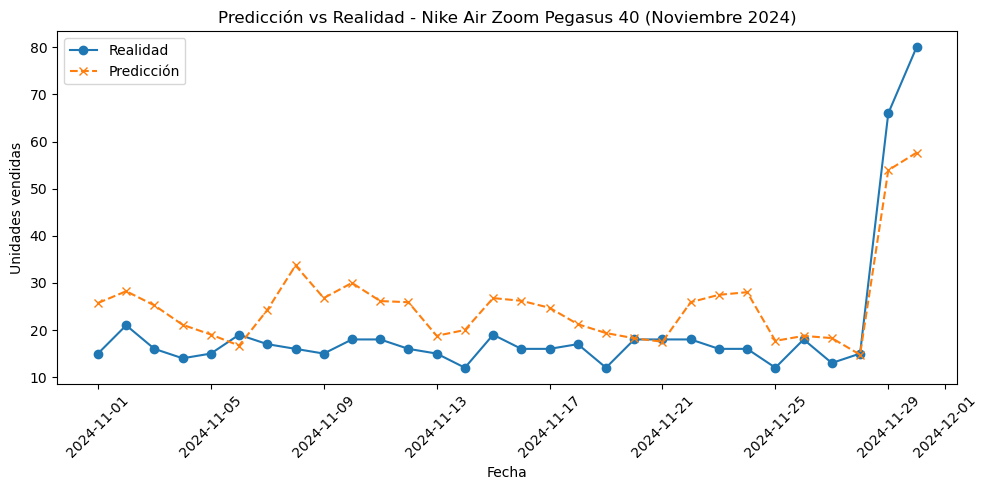

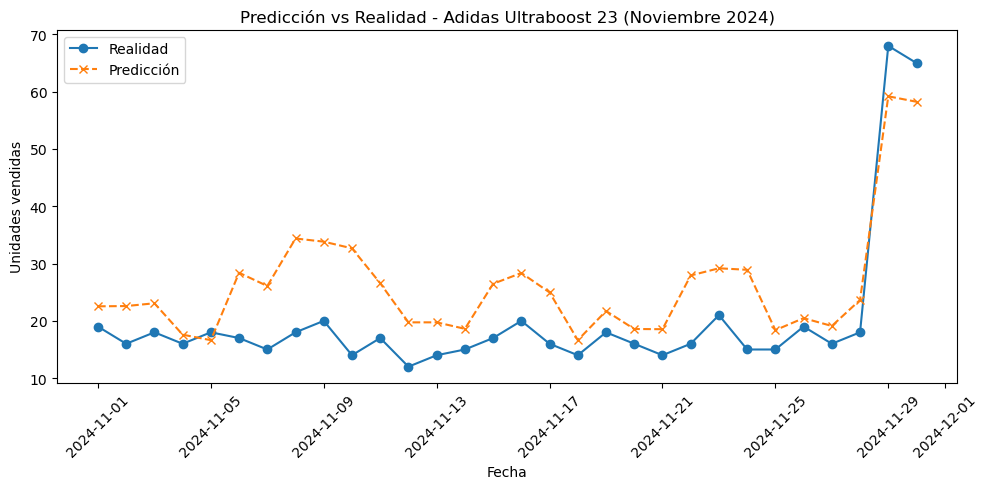

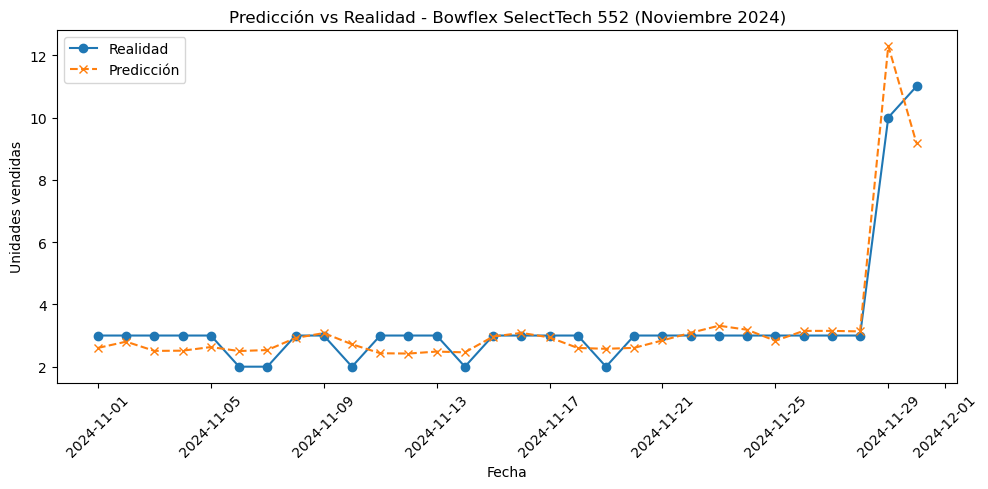

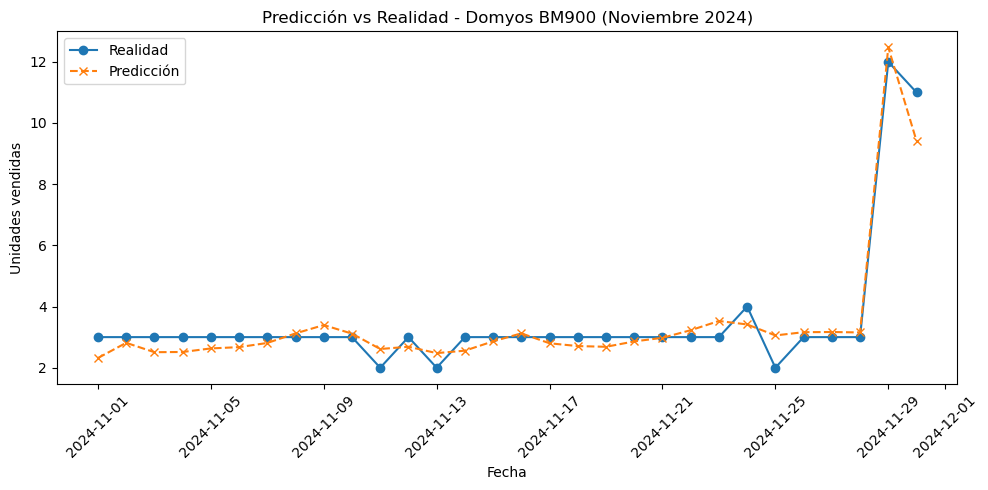

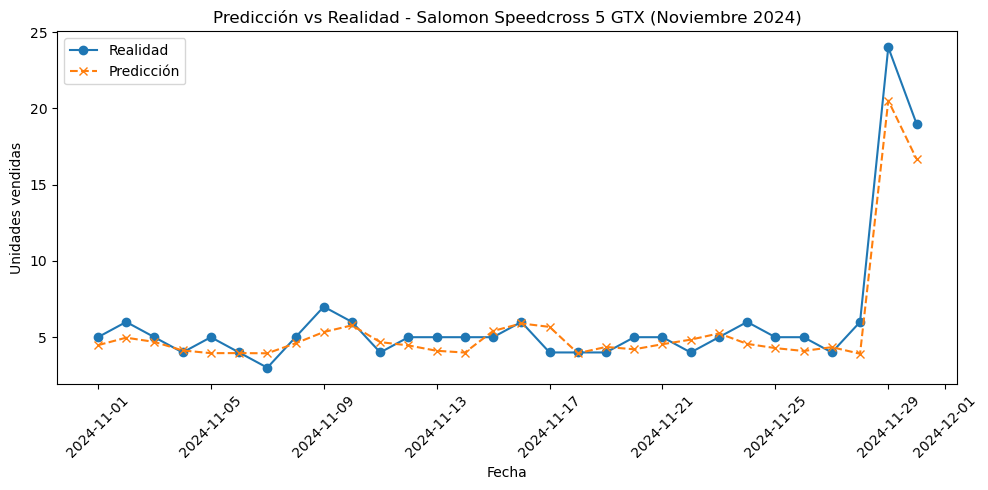

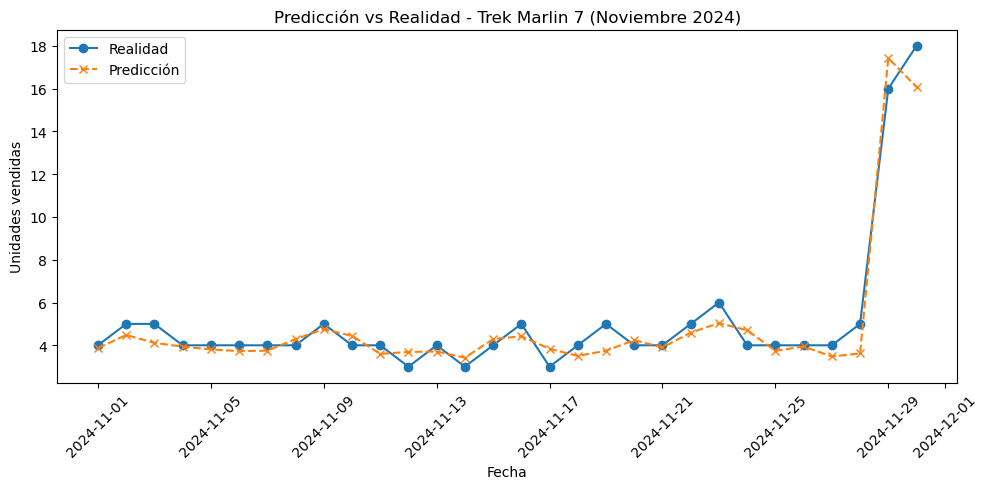

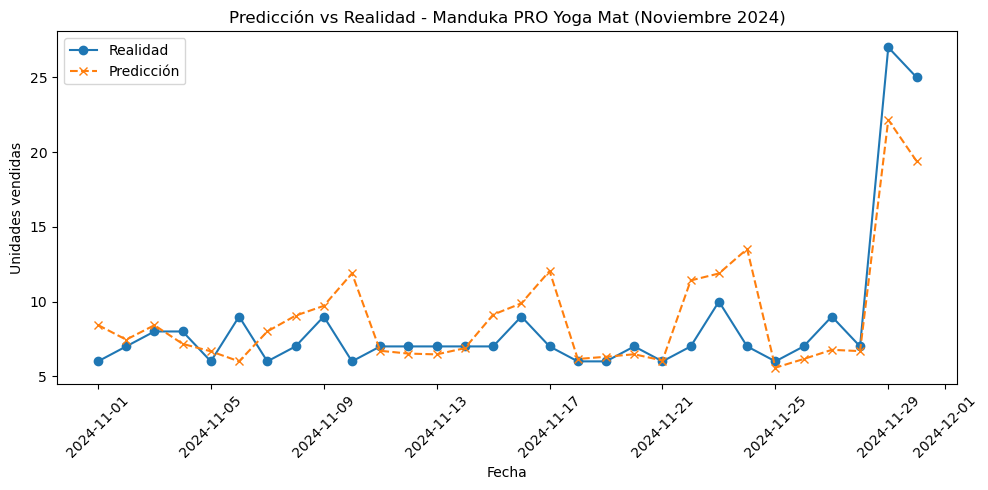

In [22]:
# --- Predicciones y gráficos para productos estrella en noviembre 2024 ---
import matplotlib.pyplot as plt

# Filtrar noviembre 2024 y productos estrella
df_nov_estrella = validation_df[(validation_df['anio'] == 2024) & (validation_df['mes'] == 11) & (validation_df['es_estrella'] == 1)].copy()

# Obtener los nombres únicos de los productos estrella
productos_estrella = df_nov_estrella['nombre'].unique()

for producto in productos_estrella:
    df_prod = df_nov_estrella[df_nov_estrella['nombre'] == producto].copy()
    if df_prod.empty:
        continue
    X_prod = df_prod[predictoras]
    y_real = df_prod['unidades_vendidas']
    fechas = df_prod['fecha']
    y_pred = model.predict(X_prod)
    plt.figure(figsize=(10,5))
    plt.plot(fechas, y_real, marker='o', label='Realidad')
    plt.plot(fechas, y_pred, marker='x', linestyle='--', label='Predicción')
    plt.title(f'Predicción vs Realidad - {producto} (Noviembre 2024)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [23]:
# --- MAE para cada producto estrella en noviembre 2024 ---
from sklearn.metrics import mean_absolute_error
mae_productos = {}
for producto in productos_estrella:
    df_prod = df_nov_estrella[df_nov_estrella['nombre'] == producto].copy()
    if df_prod.empty:
        continue
    X_prod = df_prod[predictoras]
    y_real = df_prod['unidades_vendidas']
    y_pred = model.predict(X_prod)
    mae = mean_absolute_error(y_real, y_pred)
    mae_productos[producto] = mae

print('MAE por producto estrella en noviembre 2024:')
for producto, mae in mae_productos.items():
    print(f'{producto}: MAE = {mae:.2f}')

MAE por producto estrella en noviembre 2024:
Nike Air Zoom Pegasus 40: MAE = 7.87
Adidas Ultraboost 23: MAE = 7.32
Bowflex SelectTech 552: MAE = 0.43
Domyos BM900: MAE = 0.38
Salomon Speedcross 5 GTX: MAE = 0.86
Trek Marlin 7: MAE = 0.55
Manduka PRO Yoga Mat: MAE = 1.87


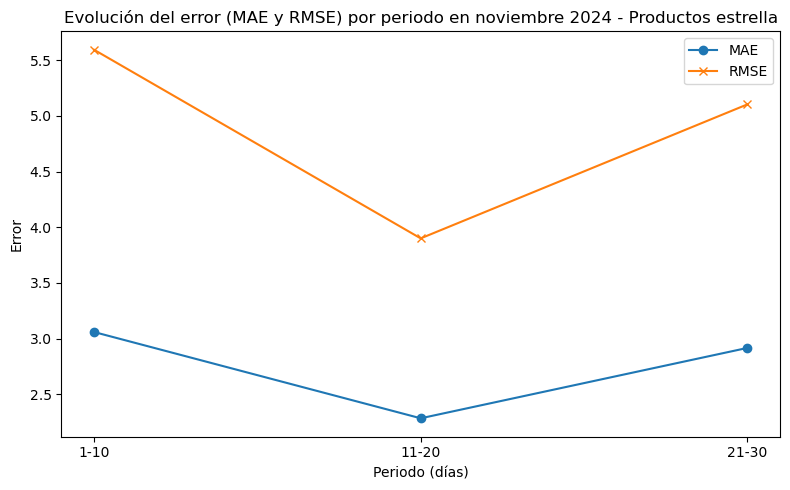

Periodo 1-10: MAE = 3.06, RMSE = 5.59
Periodo 11-20: MAE = 2.28, RMSE = 3.90
Periodo 21-30: MAE = 2.92, RMSE = 5.10


In [24]:
# --- Análisis de degradación del error en noviembre 2024 por periodos de 10 días ---
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crear los 3 periodos de 10 días
periodos = [(1,10), (11,20), (21,30)]
mae_periodos = []
rmse_periodos = []
labels = []

for inicio, fin in periodos:
    df_periodo = df_nov_estrella[(df_nov_estrella['dia_mes'] >= inicio) & (df_nov_estrella['dia_mes'] <= fin)]
    if df_periodo.empty:
        mae_periodos.append(np.nan)
        rmse_periodos.append(np.nan)
        labels.append(f'{inicio}-{fin}')
        continue
    X_p = df_periodo[predictoras]
    y_real_p = df_periodo['unidades_vendidas']
    y_pred_p = model.predict(X_p)
    mae_p = mean_absolute_error(y_real_p, y_pred_p)
    rmse_p = np.sqrt(mean_squared_error(y_real_p, y_pred_p))
    mae_periodos.append(mae_p)
    rmse_periodos.append(rmse_p)
    labels.append(f'{inicio}-{fin}')

plt.figure(figsize=(8,5))
plt.plot(labels, mae_periodos, marker='o', label='MAE')
plt.plot(labels, rmse_periodos, marker='x', label='RMSE')
plt.title('Evolución del error (MAE y RMSE) por periodo en noviembre 2024 - Productos estrella')
plt.xlabel('Periodo (días)')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()

for i, (mae, rmse) in enumerate(zip(mae_periodos, rmse_periodos)):
    print(f'Periodo {labels[i]}: MAE = {mae:.2f}, RMSE = {rmse:.2f}')

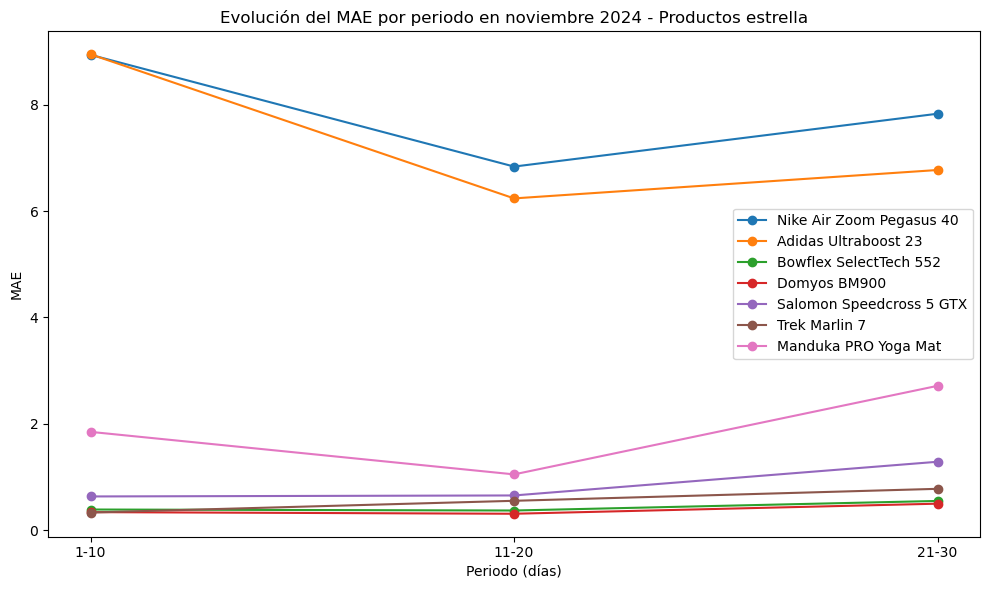

Nike Air Zoom Pegasus 40:
  Periodo 1-10: MAE = 8.94
  Periodo 11-20: MAE = 6.84
  Periodo 21-30: MAE = 7.83
Adidas Ultraboost 23:
  Periodo 1-10: MAE = 8.95
  Periodo 11-20: MAE = 6.24
  Periodo 21-30: MAE = 6.77
Bowflex SelectTech 552:
  Periodo 1-10: MAE = 0.39
  Periodo 11-20: MAE = 0.37
  Periodo 21-30: MAE = 0.55
Domyos BM900:
  Periodo 1-10: MAE = 0.34
  Periodo 11-20: MAE = 0.31
  Periodo 21-30: MAE = 0.50
Salomon Speedcross 5 GTX:
  Periodo 1-10: MAE = 0.63
  Periodo 11-20: MAE = 0.65
  Periodo 21-30: MAE = 1.28
Trek Marlin 7:
  Periodo 1-10: MAE = 0.33
  Periodo 11-20: MAE = 0.55
  Periodo 21-30: MAE = 0.77
Manduka PRO Yoga Mat:
  Periodo 1-10: MAE = 1.85
  Periodo 11-20: MAE = 1.05
  Periodo 21-30: MAE = 2.71


In [25]:
# --- Evolución del MAE por periodo para cada producto estrella en un solo gráfico ---
periodos = [(1,10), (11,20), (21,30)]
labels = [f'{inicio}-{fin}' for inicio, fin in periodos]
mae_por_producto = {producto: [] for producto in productos_estrella}

for producto in productos_estrella:
    df_prod = df_nov_estrella[df_nov_estrella['nombre'] == producto].copy()
    for inicio, fin in periodos:
        df_periodo = df_prod[(df_prod['dia_mes'] >= inicio) & (df_prod['dia_mes'] <= fin)]
        if df_periodo.empty:
            mae_por_producto[producto].append(np.nan)
            continue
        X_p = df_periodo[predictoras]
        y_real_p = df_periodo['unidades_vendidas']
        y_pred_p = model.predict(X_p)
        mae_p = mean_absolute_error(y_real_p, y_pred_p)
        mae_por_producto[producto].append(mae_p)

plt.figure(figsize=(10,6))
for producto, maes in mae_por_producto.items():
    plt.plot(labels, maes, marker='o', label=producto)
plt.title('Evolución del MAE por periodo en noviembre 2024 - Productos estrella')
plt.xlabel('Periodo (días)')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

for producto, maes in mae_por_producto.items():
    print(f'{producto}:')
    for i, mae in enumerate(maes):
        print(f'  Periodo {labels[i]}: MAE = {mae:.2f}')

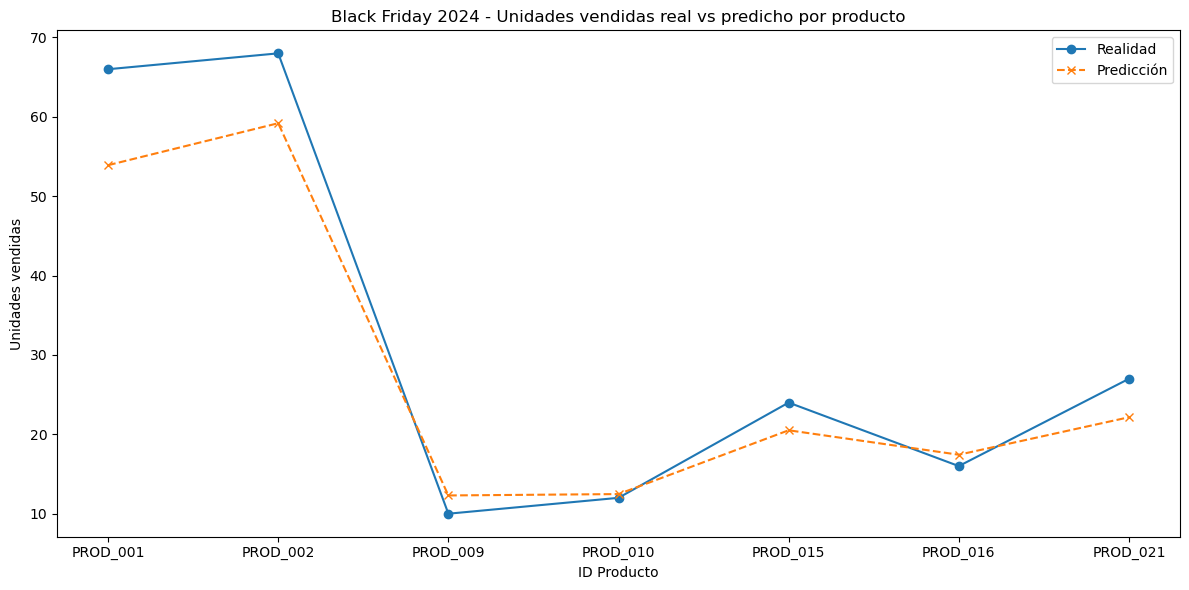

Producto PROD_001: Real = 66.00, Predicción = 53.91
Producto PROD_002: Real = 68.00, Predicción = 59.20
Producto PROD_009: Real = 10.00, Predicción = 12.30
Producto PROD_010: Real = 12.00, Predicción = 12.47
Producto PROD_015: Real = 24.00, Predicción = 20.51
Producto PROD_016: Real = 16.00, Predicción = 17.43
Producto PROD_021: Real = 27.00, Predicción = 22.15


In [26]:
# --- Análisis específico de Black Friday 2024: gráfico real vs predicho por producto ---
fecha_bf = df_nov_estrella[df_nov_estrella['es_black_friday'] == True]['fecha'].unique()
if len(fecha_bf) > 0:
    fecha_bf = fecha_bf[0]
    df_bf = df_nov_estrella[df_nov_estrella['fecha'] == fecha_bf].copy()
    if not df_bf.empty:
        X_bf = df_bf[predictoras]
        y_real_bf = df_bf['unidades_vendidas']
        y_pred_bf = model.predict(X_bf)
        producto_ids = df_bf['producto_id']
        plt.figure(figsize=(12,6))
        plt.plot(producto_ids, y_real_bf, marker='o', label='Realidad')
        plt.plot(producto_ids, y_pred_bf, marker='x', linestyle='--', label='Predicción')
        plt.title(f'Black Friday 2024 - Unidades vendidas real vs predicho por producto')
        plt.xlabel('ID Producto')
        plt.ylabel('Unidades vendidas')
        plt.legend()
        plt.tight_layout()
        plt.show()
        for pid, real, pred in zip(producto_ids, y_real_bf, y_pred_bf):
            print(f'Producto {pid}: Real = {real:.2f}, Predicción = {pred:.2f}')
    else:
        print('No hay datos de productos estrella para Black Friday 2024.')
else:
    print('No se encontró la fecha de Black Friday en noviembre 2024.')

In [27]:
# --- Reentrenamiento del modelo final con todo el histórico disponible ---
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selección de variables predictoras (excluyendo fecha, ingresos y tipo object)
excluir = ['fecha','ingresos','unidades_vendidas']
predictoras_final = [col for col in integrado_df.columns if col not in excluir and integrado_df[col].dtype != 'object']

X_final = integrado_df[predictoras_final]
y_final = integrado_df['unidades_vendidas']

modelo_final = HistGradientBoostingRegressor(learning_rate=0.03, max_iter=400, max_depth=7, l2_regularization=1.0, random_state=42)
modelo_final.fit(X_final, y_final)

print('Modelo final entrenado con todo el histórico 2021-2024.')
print(f'Registros usados: {X_final.shape[0]}')

Modelo final entrenado con todo el histórico 2021-2024.
Registros usados: 2880


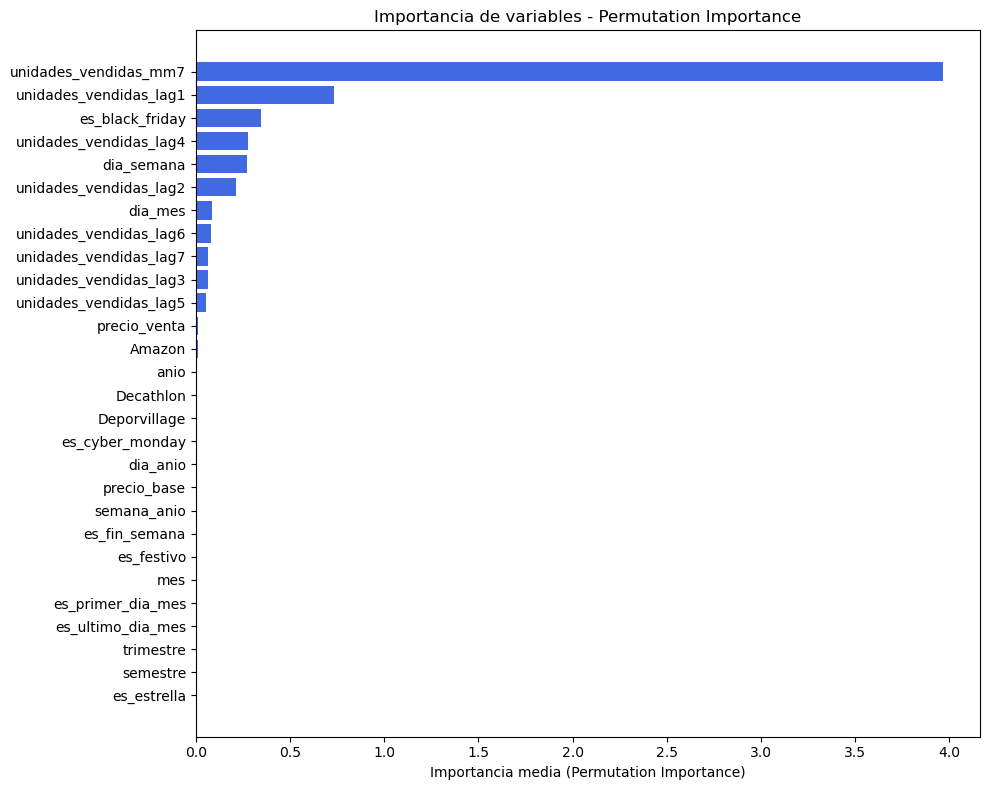

Modelo final guardado en models/modelo_final.joblib


In [28]:
# 🤖 Importancia de variables con Permutation Importance y guardado del modelo final
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Calcular permutation importance sobre el conjunto completo
result = permutation_importance(modelo_final, X_final, y_final, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

# Extraer importancias y ordenar
importancias = result.importances_mean
indices = np.argsort(importancias)[::-1]
nombres = np.array(X_final.columns)[indices]

# Gráfico de barras horizontales ordenado
plt.figure(figsize=(10,8))
plt.barh(nombres, importancias[indices], color='royalblue')
plt.xlabel('Importancia media (Permutation Importance)')
plt.title('Importancia de variables - Permutation Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar el modelo final en la carpeta models
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en models/modelo_final.joblib')